# Seaborn

## 导入工具库

用Seaborn绘制统计型数据可视图

Seaborn是基于matplotlib开发的高阶Python数据可视图库，用于绘制优雅、美观的统计图形。

使用下列别名导入该库：

In [57]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

使用 Seaborn 创建图形的基本步骤：
- Step 1 准备数据
- Step 2 设定画布外观
- Step 3 使用 Seaborn 绘图
- Step 4 自定义图形
- Step 5 展示结果图

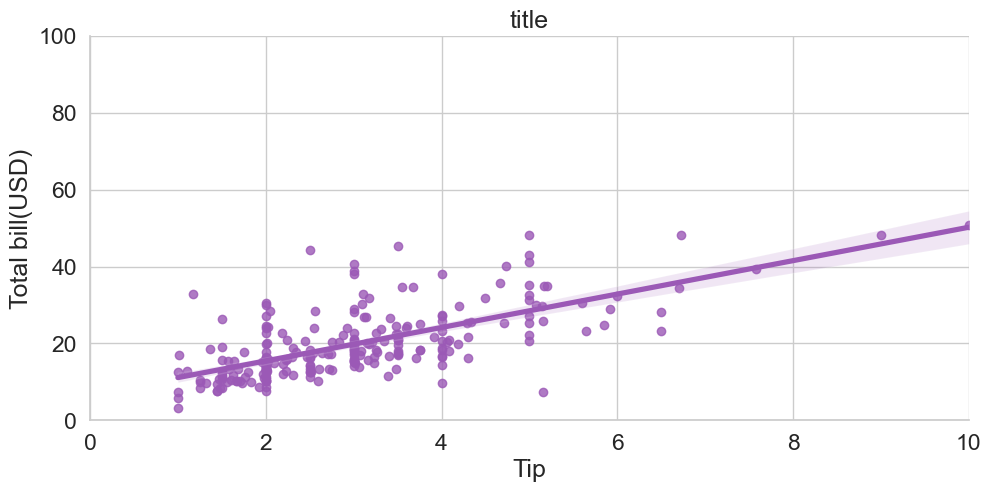

In [58]:
tips = pd.read_csv('../../_static/dataset/tips.csv')
# tips = sns.load_dataset("tips")  #Step 1
sns.set_style("whitegrid")  #Step 2
g = sns.lmplot(x="tip", y="total_bill", data=tips, aspect=2)  #Step 3
g = (g.set_axis_labels("Tip", "Total bill(USD)").set(xlim=(0, 10), ylim=(0, 100)))
plt.title("title")  #Step 4
plt.show(g)  #Step 5

## 数据准备

**可以是numpy数组和Dataframe等数据格式**

In [59]:
import pandas as pd
import numpy as np

In [60]:
uniform_data = np.random.rand(10, 12)

In [61]:
data = pd.DataFrame({'x': np.arange(1, 101), 'y': np.random.normal(0, 4, 100)})

**Seaborn 提供了内置数据集：**

In [62]:
titanic = pd.read_csv('../../_static/dataset/titanic.csv')

In [63]:
iris = pd.read_csv('../../_static/dataset/iris.csv')

## 画布外观

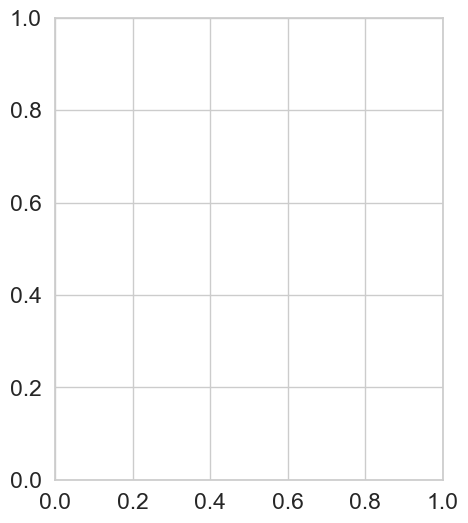

In [64]:
f, ax = plt.subplots(figsize=(5, 6))  #创建画布与子图

### Seaborn 样式

In [65]:
sns.set()  #设置或重置Seaborn默认值

In [66]:
sns.set_style("whitegrid")  #设置 matplotlib 参数

In [67]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})  #设置matplotlib参数

In [68]:
sns.axes_style("whitegrid")  #返回参数字典或用with设置临时样式

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

### 上下文函数

In [69]:
sns.set_context("talk")  #将上下文设置为"talk"

In [70]:
sns.set_context("notebook",
                font_scale=1.5,
                rc={"lines.linewidth": 2.5})  #上下文设为"notebook"，缩放字体，覆盖参数映射

### 调色板

In [71]:
sns.set_palette("husl", 3)  #定义调色板

In [72]:
sns.color_palette("husl")  #使用with临时设置调色板

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

In [73]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

In [74]:
sns.set_palette(flatui)  #设置调色板

## 使用Seaborn绘图

### 坐标轴栅格

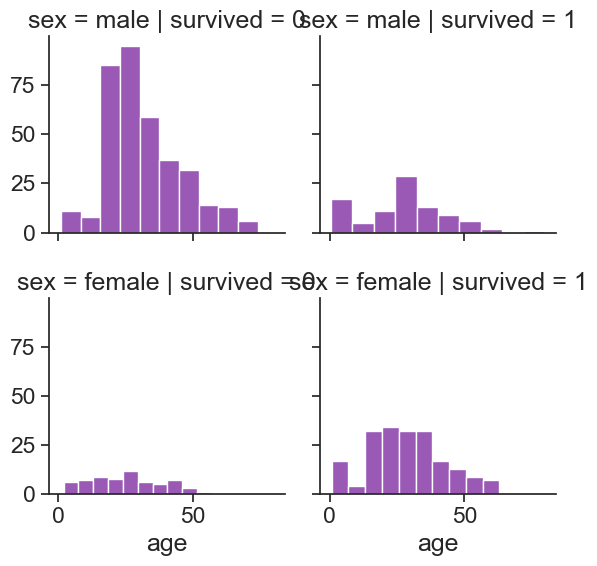

In [75]:
g = sns.FacetGrid(titanic, col="survived", row="sex")  #绘制条件关系的子图栅格
g = g.map(plt.hist, "age")

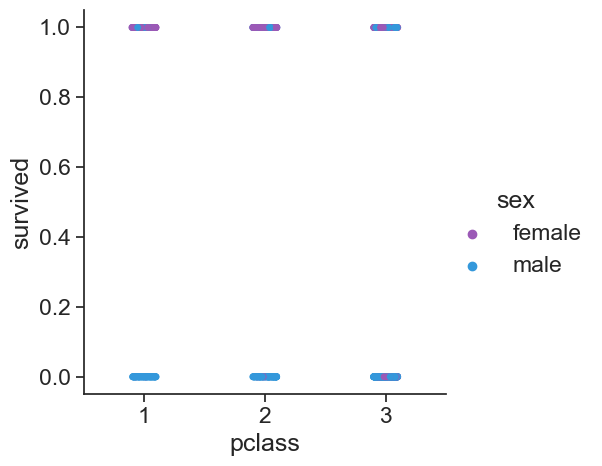

In [76]:
sns.catplot(x="pclass", y="survived", hue="sex", data=titanic)  #在分面栅格上绘制分类图

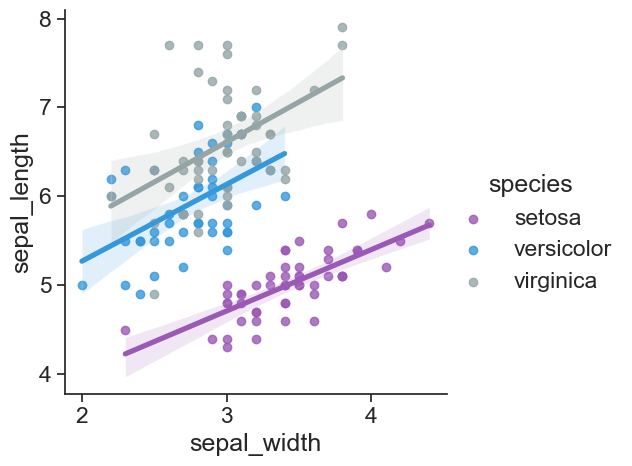

In [77]:
sns.lmplot(x="sepal_width", y="sepal_length", hue="species", data=iris)  #绘制适配分面栅格的数据与回归模型

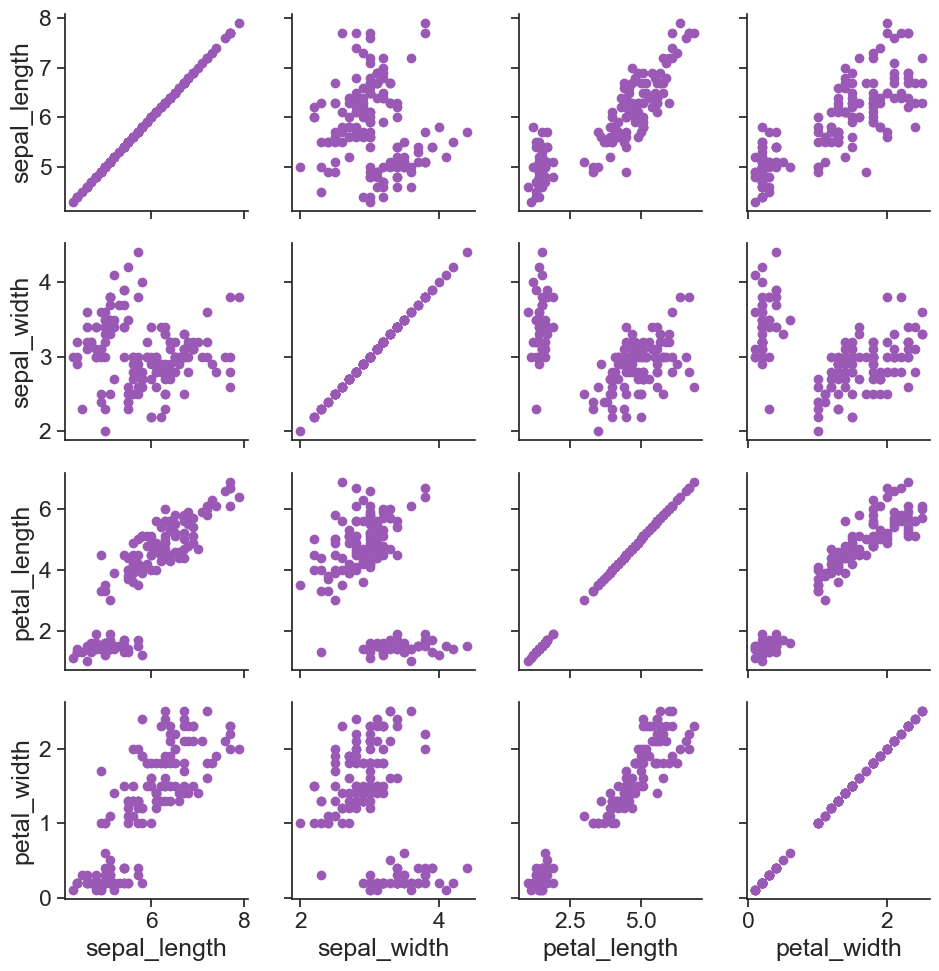

In [78]:
h = sns.PairGrid(iris)  #绘制配对关系的子图栅格
h = h.map(plt.scatter)  #绘制配对的双变量分布

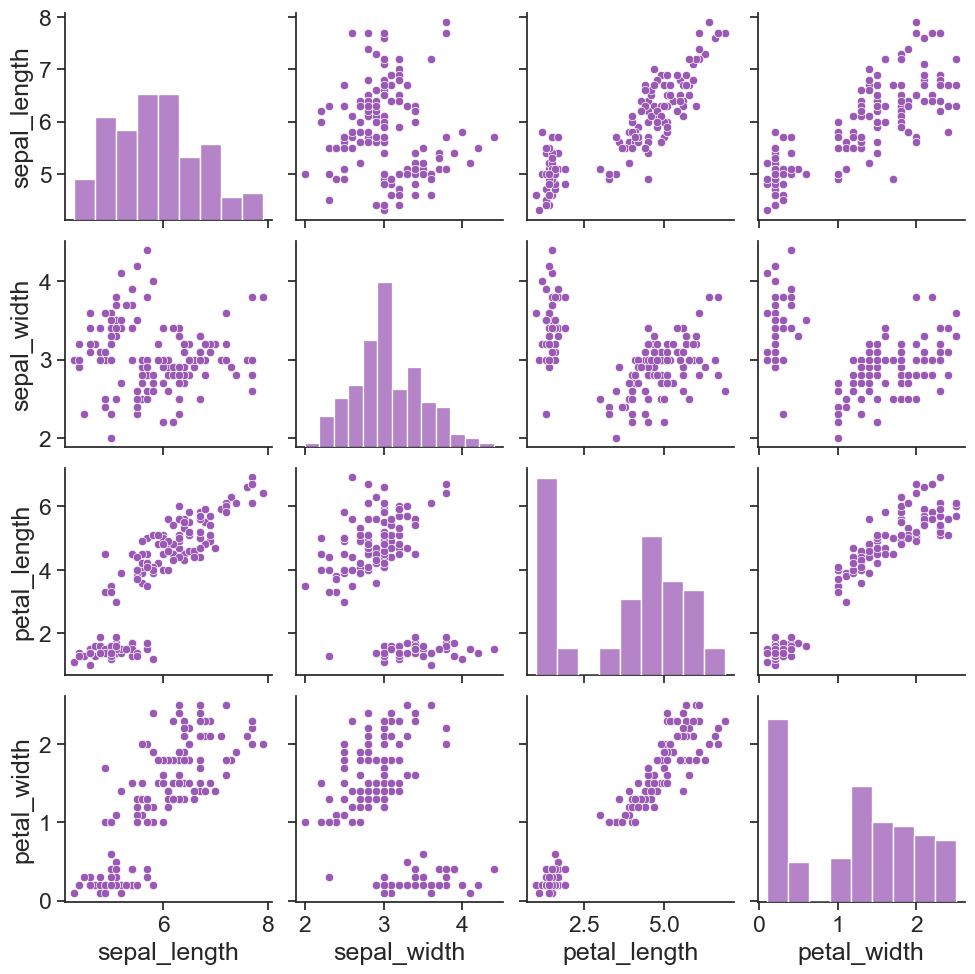

In [79]:
sns.pairplot(iris)  #绘制双变量图的边际单变量图栅格

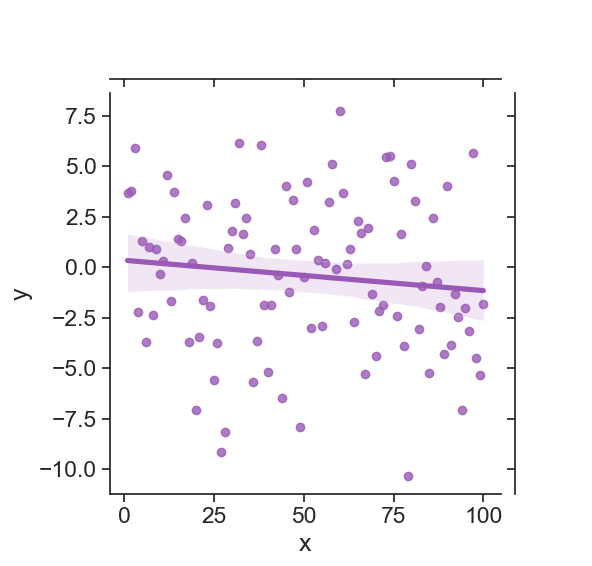

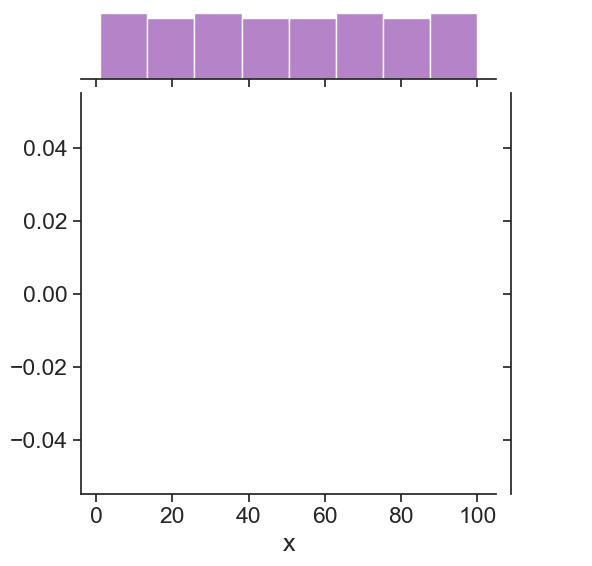

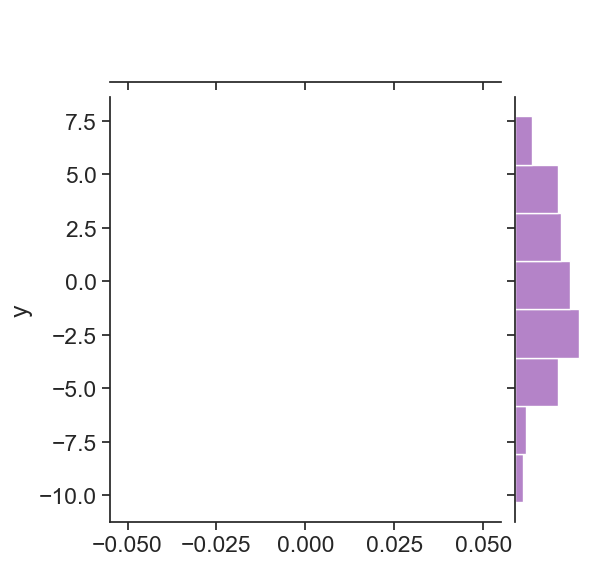

In [80]:
i = sns.JointGrid(x="x", y="y", data=data)
i = i.plot(sns.regplot, sns.jointplot)

### 各类图形

**散点图**

<Axes: xlabel='species', ylabel='petal_length'>

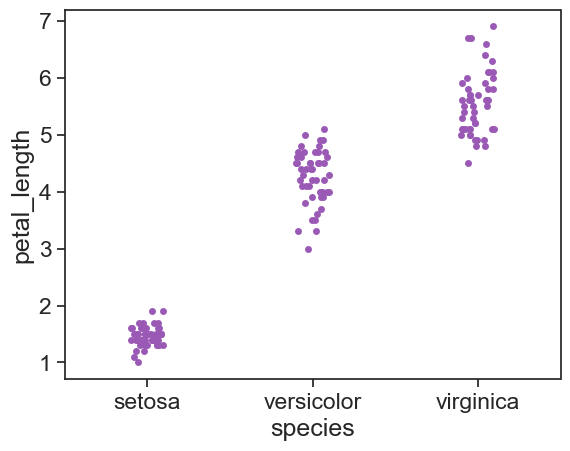

In [81]:
sns.stripplot(x="species", y="petal_length", data=iris)  #含分类变量的抖动图

<Axes: xlabel='species', ylabel='petal_length'>

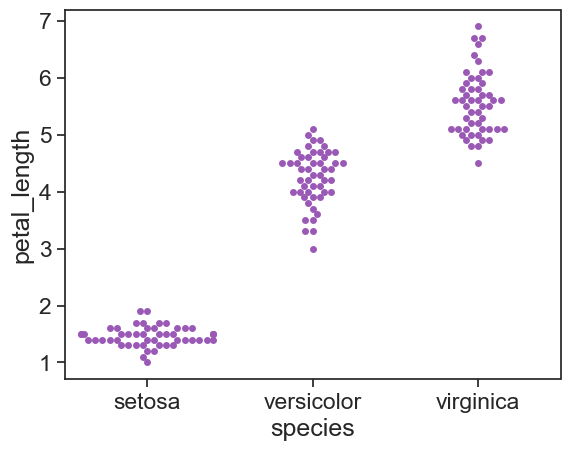

In [82]:
sns.swarmplot(x="species", y="petal_length", data=iris)  #不重叠分类蜂群图

**条形图**

<Axes: xlabel='sex', ylabel='survived'>

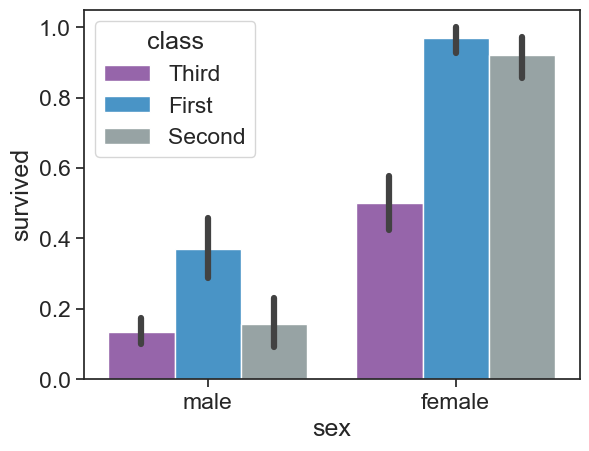

In [83]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic)  #用散点图示符显示点估计值和置信区间

**计数图**

<Axes: xlabel='deck', ylabel='count'>

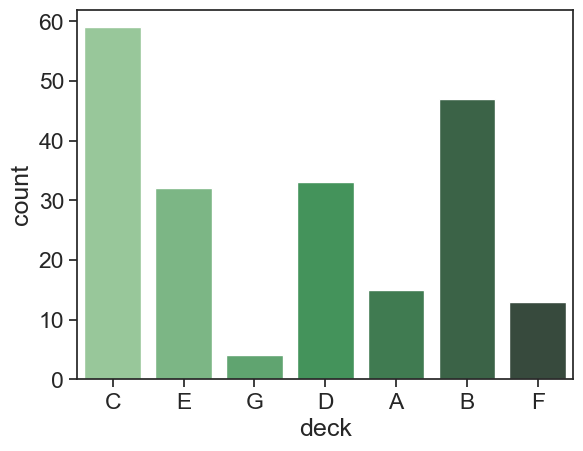

In [84]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")  #显示观测数量

**点图**

<Axes: xlabel='class', ylabel='survived'>

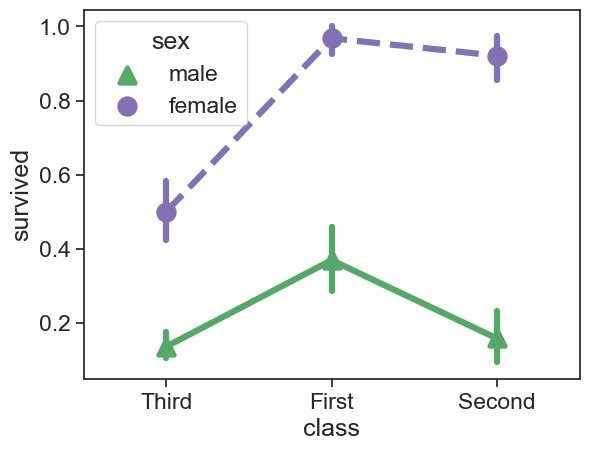

In [85]:
sns.pointplot(x="class",
              y="survived",
              hue="sex",
              data=titanic,
              palette={"male": "g",
                       "female": "m"},
              markers=["^", "o"],
              linestyles=["-", "--"])  #显示点估计和置信区间

**箱形图**

<Axes: xlabel='alive', ylabel='age'>

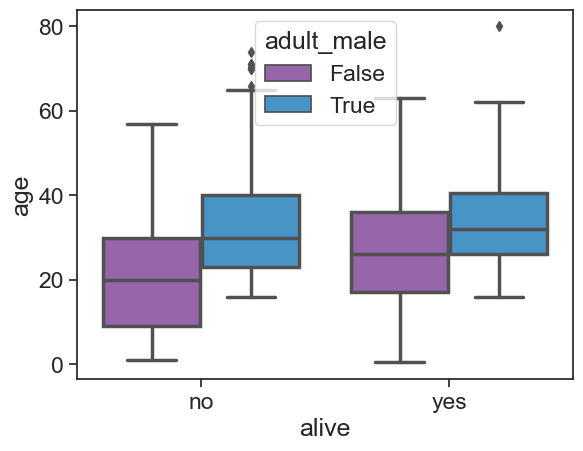

In [86]:
sns.boxplot(x="alive", y="age", hue="adult_male", data=titanic)  #箱形图

<Axes: >

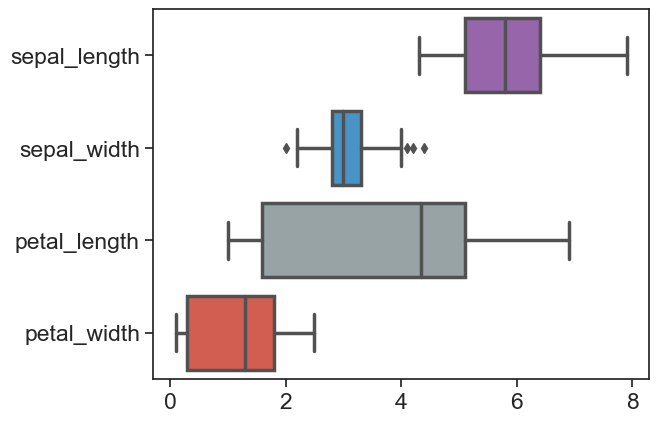

In [87]:
sns.boxplot(data=iris, orient="h")  #使用宽表数据的箱形图

**小提琴图**

<Axes: xlabel='age', ylabel='sex'>

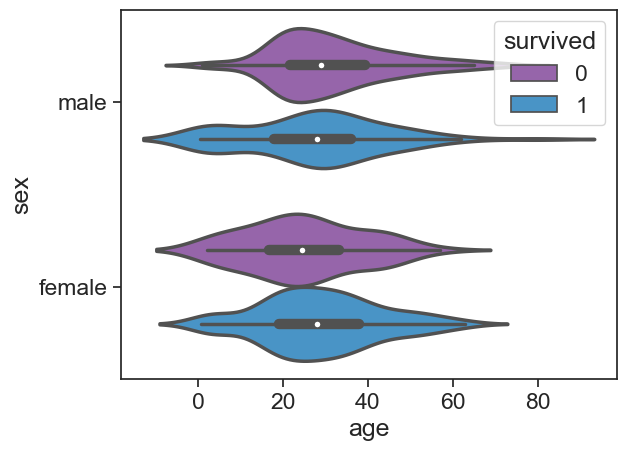

In [88]:
sns.violinplot(x="age", y="sex", hue="survived", data=titanic)  #小提琴图

### 回归图

In [89]:
sns.regplot(x="sepal_width", y="sepal_length", data=iris, ax=ax)  #绘制与线性回归模型拟合的数据

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

### 分布图

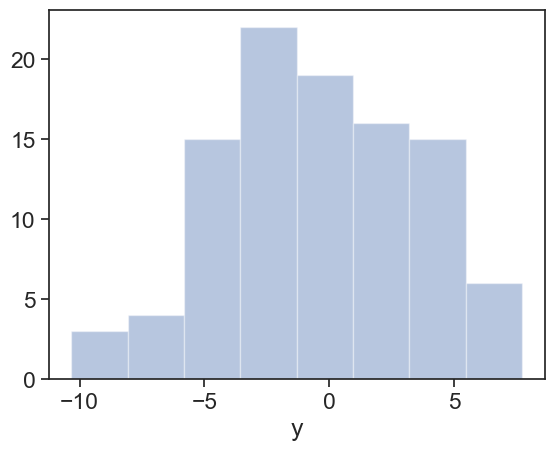

In [90]:
plot = sns.distplot(data.y, kde=False, color="b")  #绘制单变量分布

### 矩阵图

<Axes: >

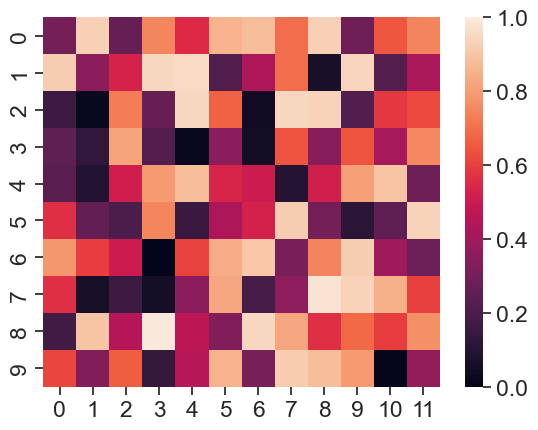

In [91]:
sns.heatmap(uniform_data, vmin=0, vmax=1)  #热力图

## 深度自定义

### Axisgrid对象

In [92]:
g.despine(left=True)  #移除左框

In [93]:
g.set_ylabels("Survived")  #设置Y轴标签

In [94]:
g.set_xticklabels(rotation=45)  #设置X轴刻度标签

In [95]:
g.set_axis_labels("Survived", "Sex")  #设置坐标轴标签

In [96]:
h.set(xlim=(0, 5), ylim=(0, 5), xticks=[0, 2.5, 5], yticks=[0, 2.5, 5])  #设置X与Y轴的幅度区间和刻度

### 图形

Text(0.5, 1.0, 'A Title')

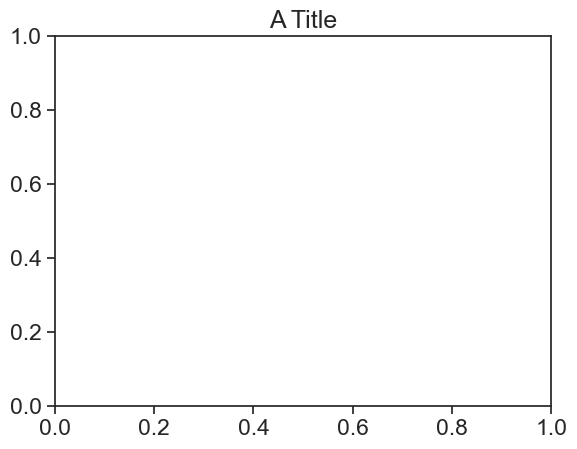

In [97]:
plt.title("A Title")  #添加图形标题

Text(0, 0.5, 'Survived')

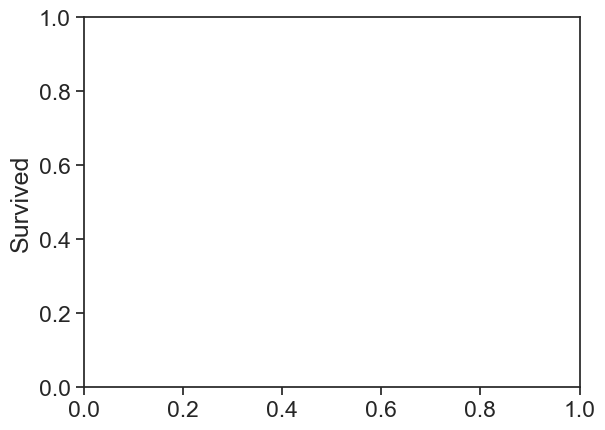

In [98]:
plt.ylabel("Survived")  #调整Y轴标签

Text(0.5, 0, 'Sex')

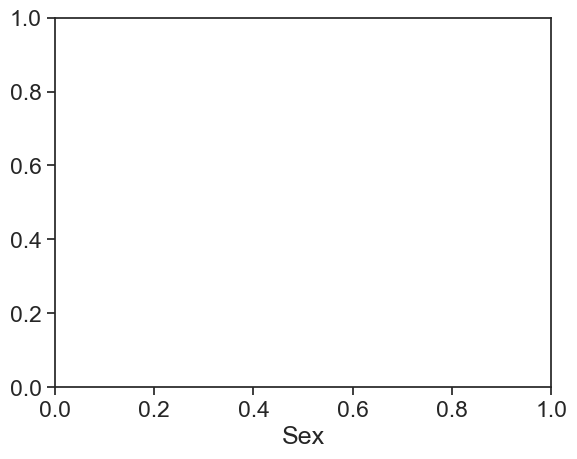

In [99]:
plt.xlabel("Sex")  #调整X轴标签

(0.0, 100.0)

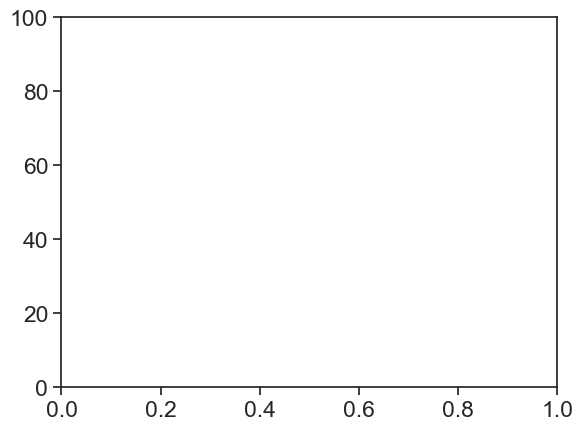

In [100]:
plt.ylim(0, 100)  #调整Y轴幅度区间

(0.0, 10.0)

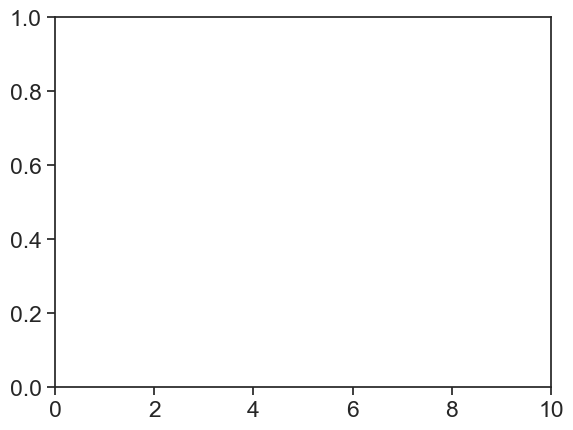

In [101]:
plt.xlim(0, 10)  #调整X轴幅度区间

In [102]:
plt.setp(ax, yticks=[0, 5])  #调整图形属性

In [103]:
plt.tight_layout()  #调整子图参数

<Figure size 640x480 with 0 Axes>

## 显示或保存图形

**show与savefig函数**

In [104]:
plt.show()  #显示图形

In [105]:
plt.savefig("foo.png")  #将画布保存为图形

<Figure size 640x480 with 0 Axes>

In [106]:
plt.savefig("foo.png", transparent=True)  #保存透明画布

<Figure size 640x480 with 0 Axes>

## 关闭与清除

**绘图关闭与清除操作**

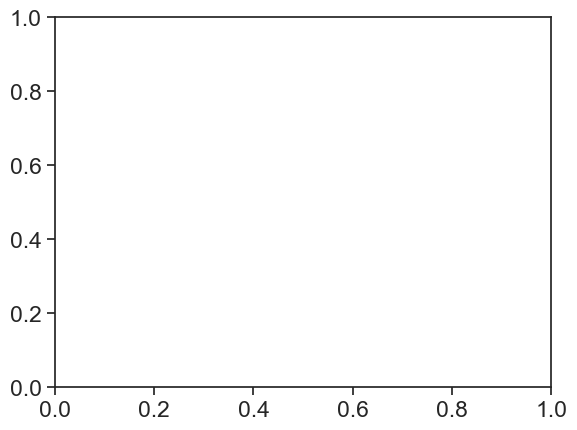

In [107]:
plt.cla()  #清除坐标轴

In [108]:
plt.clf()  #清除画布

<Figure size 640x480 with 0 Axes>

In [109]:
plt.close()  #关闭窗口